In [3]:
# Import MNIST data and python basics
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from cnn_from_scratch.datasets import load_mnist, show_mnist_digit

x_train, y_train, x_test, y_test = load_mnist()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 784) (60000, 10) (10000, 784) (10000, 10)


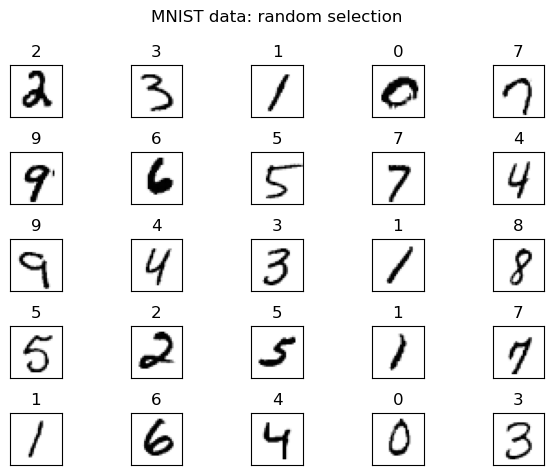

In [4]:
# Random MNIST visualization
plt.close('all')
plt.ion()
fig, axs = plt.subplots(5, 5)
idxs = np.random.randint(len(x_train), size=25)
for q in range(25):
    i, j = q // 5, q % 5
    show_mnist_digit(x_train[idxs[q]], y_train[idxs[q]], axs[i, j])
fig.suptitle('MNIST data: random selection')
fig.tight_layout()

Iteration 1, loss = 0.57556804
Iteration 1, loss = 0.21070932
Iteration 1, loss = 0.15242643
Iteration 1, loss = 0.11888836
Iteration 1, loss = 0.09673377
Iteration 1, loss = 0.08072849
Iteration 1, loss = 0.06848649
Iteration 1, loss = 0.05871880
Iteration 1, loss = 0.05059418
Iteration 1, loss = 0.04359991
Iteration 1, loss = 0.03764388
Iteration 1, loss = 0.03250094
Iteration 1, loss = 0.02804075
Iteration 1, loss = 0.02412358
Iteration 1, loss = 0.02078045
Iteration 1, loss = 0.01795793
Iteration 1, loss = 0.01568754
Iteration 1, loss = 0.01367119
Iteration 1, loss = 0.01192664
Iteration 1, loss = 0.01045985
MLPClassifier Accuracy: 99.68%
MLPClassifier Final loss: 0.010


Text(0.5, 1.0, 'MLP Accuracy Curve')

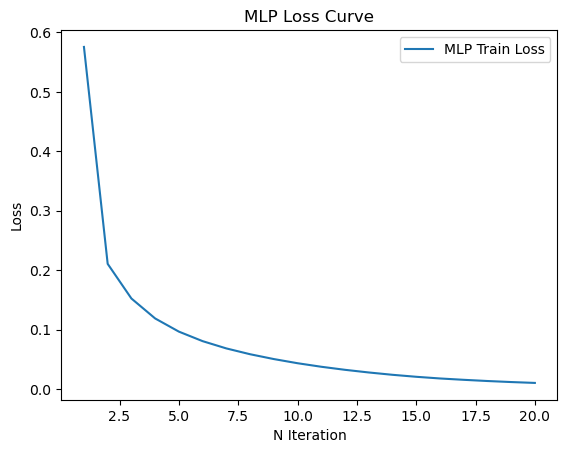

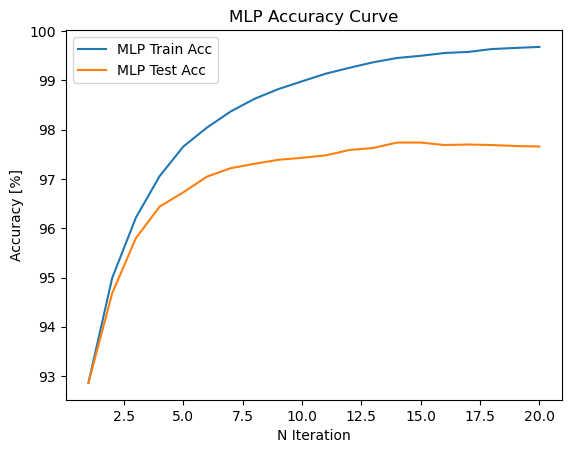

In [10]:
# Benchmark performance with sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Inputs that should match my from_scratch model
max_iter = 20
hidden_layer_sizes = [270, 90, 30]
learning_rate_init = 1e-2
batch_size = 200
activation = 'relu'

# Train MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter, alpha=0.,
                    solver='sgd', verbose=True, random_state=1, batch_size=batch_size,
                    activation=activation, learning_rate_init=learning_rate_init)

mlp_train_acc_arr = []
mlp_test_acc_arr = []
classes = [num for num in range(10)]
for i in range(max_iter):
    mlp.partial_fit(x_train, y_train.argmax(axis=1), classes=classes)
    mlp_train_acc_arr.append(mlp.score(x_train, y_train.argmax(axis=1)))
    mlp_test_acc_arr.append(mlp.score(x_test, y_test.argmax(axis=1)))

# Predict and evaluate
final_loss = mlp.loss_
print(f"MLPClassifier Final train accuracy: {mlp_train_acc_arr[-1] * 100:.2f}%")
print(f"MLPClassifier Final train loss: {final_loss:.3f}")

loss_curve = mlp.loss_curve_
plt.close('all')
plt.figure()
plt.plot(np.arange(len(loss_curve)) + 1, loss_curve, label='MLP Train Loss')
plt.xlabel('N Iteration')
plt.ylabel('Loss')
plt.legend()
plt.title('MLP Loss Curve')

plt.figure()
plt.plot(np.arange(len(loss_curve)) + 1, np.array(mlp_train_acc_arr) * 100, label='MLP Train Acc')
plt.plot(np.arange(len(loss_curve)) + 1, np.array(mlp_test_acc_arr) * 100, label='MLP Test Acc')
plt.xlabel('N Iteration')
plt.ylabel('Accuracy [%]')
plt.legend()
plt.title('MLP Accuracy Curve')
